In this notebook, I am going to explore the scrapped vaccine date from CDC Covid Data Traker.

https://covid.cdc.gov/covid-data-tracker/#vaccinations

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
vac_408=pd.read_csv('../data/vaccinations_1611626408.csv')

In [3]:
vac_408.tail(12)

,state,total_doses_distributed,total_doses_administered,doses_distributed_100k,doses_administed_100k,people_1+_dose,doses_1+_100k,people_2_doses,doses_2_100k
51,South Dakota,106575,82512,12047.0,9327.0,63950,7229.0,18504,18504
52,Tennessee,838825,462646,12283.0,6775.0,361767,5297.0,99842,99842
53,Texas,3070825,1804006,10591.0,6222.0,1532381,5285.0,270118,270118
54,Utah,341725,229007,10659.0,7143.0,195221,6089.0,25693,25693
55,Virginia,1069725,482973,12533.0,5658.0,415684,4870.0,59852,59852
56,Veterans Health,1151525,702779,NaN,NaN,600685,NaN,101396,101396
57,Virgin Islands,14500,3399,13852.0,3247.0,2984,2851.0,415,415
58,Vermont,90000,53624,14423.0,8594.0,43356,6948.0,10195,10195
59,Washington,846625,488785,11118.0,6419.0,404326,5310.0,73738,73738
60,Wisconsin,610100,315876,10478.0,5425.0,266481,4577.0,47409,47409


In [4]:
vac_408.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     63 non-null     object 
 1   total_doses_distributed   63 non-null     int64  
 2   total_doses_administered  63 non-null     int64  
 3   doses_distributed_100k    59 non-null     float64
 4   doses_administed_100k     59 non-null     float64
 5   people_1+_dose            63 non-null     int64  
 6   doses_1+_100k             59 non-null     float64
 7   people_2_doses            63 non-null     int64  
 8   doses_2_100k              63 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 4.6+ KB


In [5]:
vac_408.dropna(inplace=True)

In [6]:
vac_408.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 62
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     59 non-null     object 
 1   total_doses_distributed   59 non-null     int64  
 2   total_doses_administered  59 non-null     int64  
 3   doses_distributed_100k    59 non-null     float64
 4   doses_administed_100k     59 non-null     float64
 5   people_1+_dose            59 non-null     int64  
 6   doses_1+_100k             59 non-null     float64
 7   people_2_doses            59 non-null     int64  
 8   doses_2_100k              59 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 4.6+ KB


In [7]:
#perpare a df for catplot

df=pd.melt(vac_408[['state','total_doses_distributed','total_doses_administered']],\
           id_vars='state',var_name='dis_vs_adm',value_name='data')
df.head()

,state,dis_vs_adm,data
0,Alaska,total_doses_distributed,155700
1,Alabama,total_doses_distributed,521225
2,Arkansas,total_doses_distributed,368650
3,American Samoa,total_doses_distributed,18450
4,Arizona,total_doses_distributed,829500


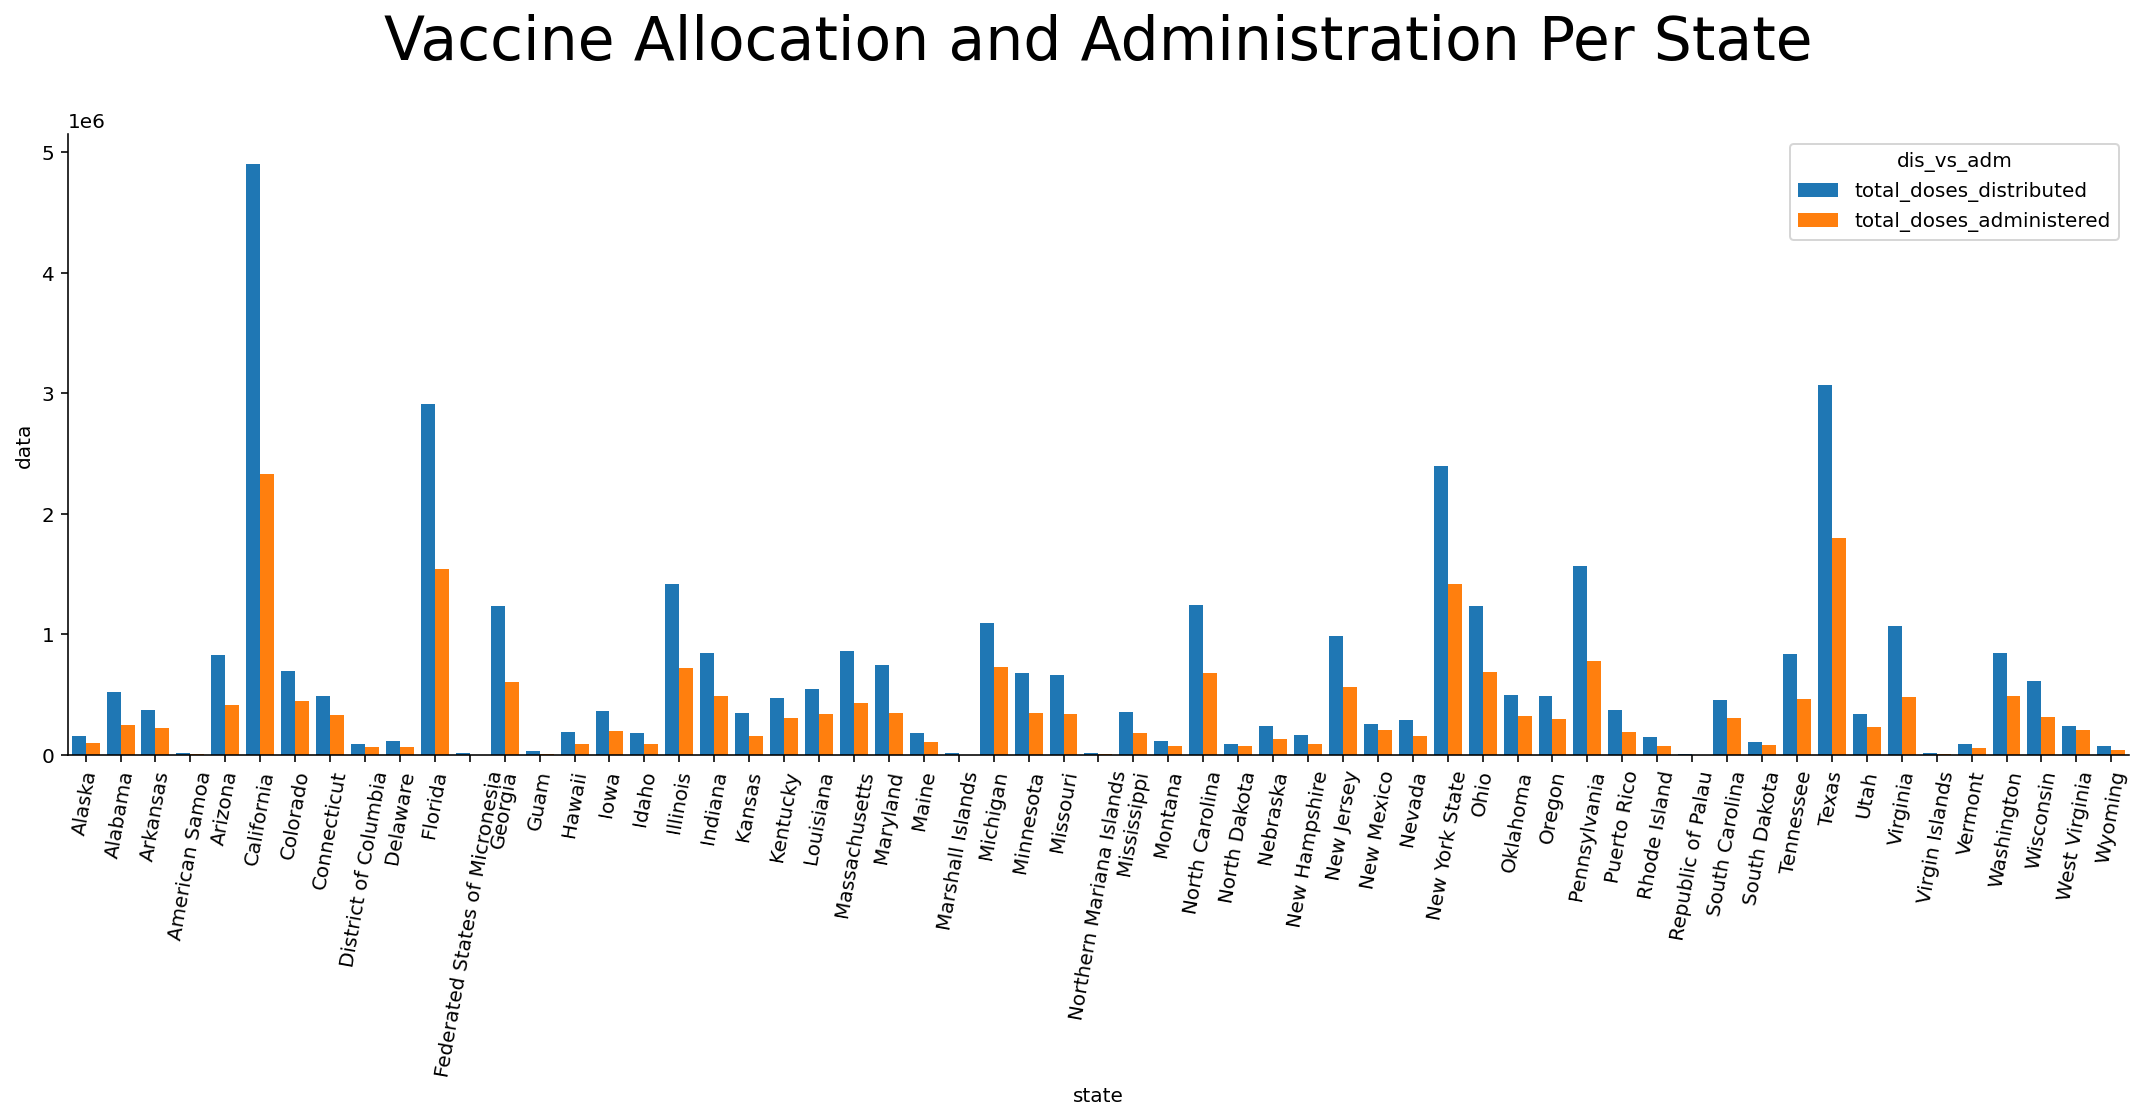

In [8]:
g=sns.catplot(x='state',y='data',hue='dis_vs_adm',legend_out=False,
                data=df,saturation=1,kind='bar',height=5, aspect=3)
plt.xticks(rotation=80)
plt.title('Vaccine Allocation and Administration Per State',size=30,y=1.1);

#Vaccine Allocation and Administration per state in alphabet order

In [9]:
#make a df that's sorted by the doses number for catplot 

df_sort=df.sort_values(by='data',ascending=False)
df_sort.head()

,state,dis_vs_adm,data
5,California,total_doses_distributed,4906525
50,Texas,total_doses_distributed,3070825
10,Florida,total_doses_distributed,2908275
39,New York State,total_doses_distributed,2395950
64,California,total_doses_administered,2330633


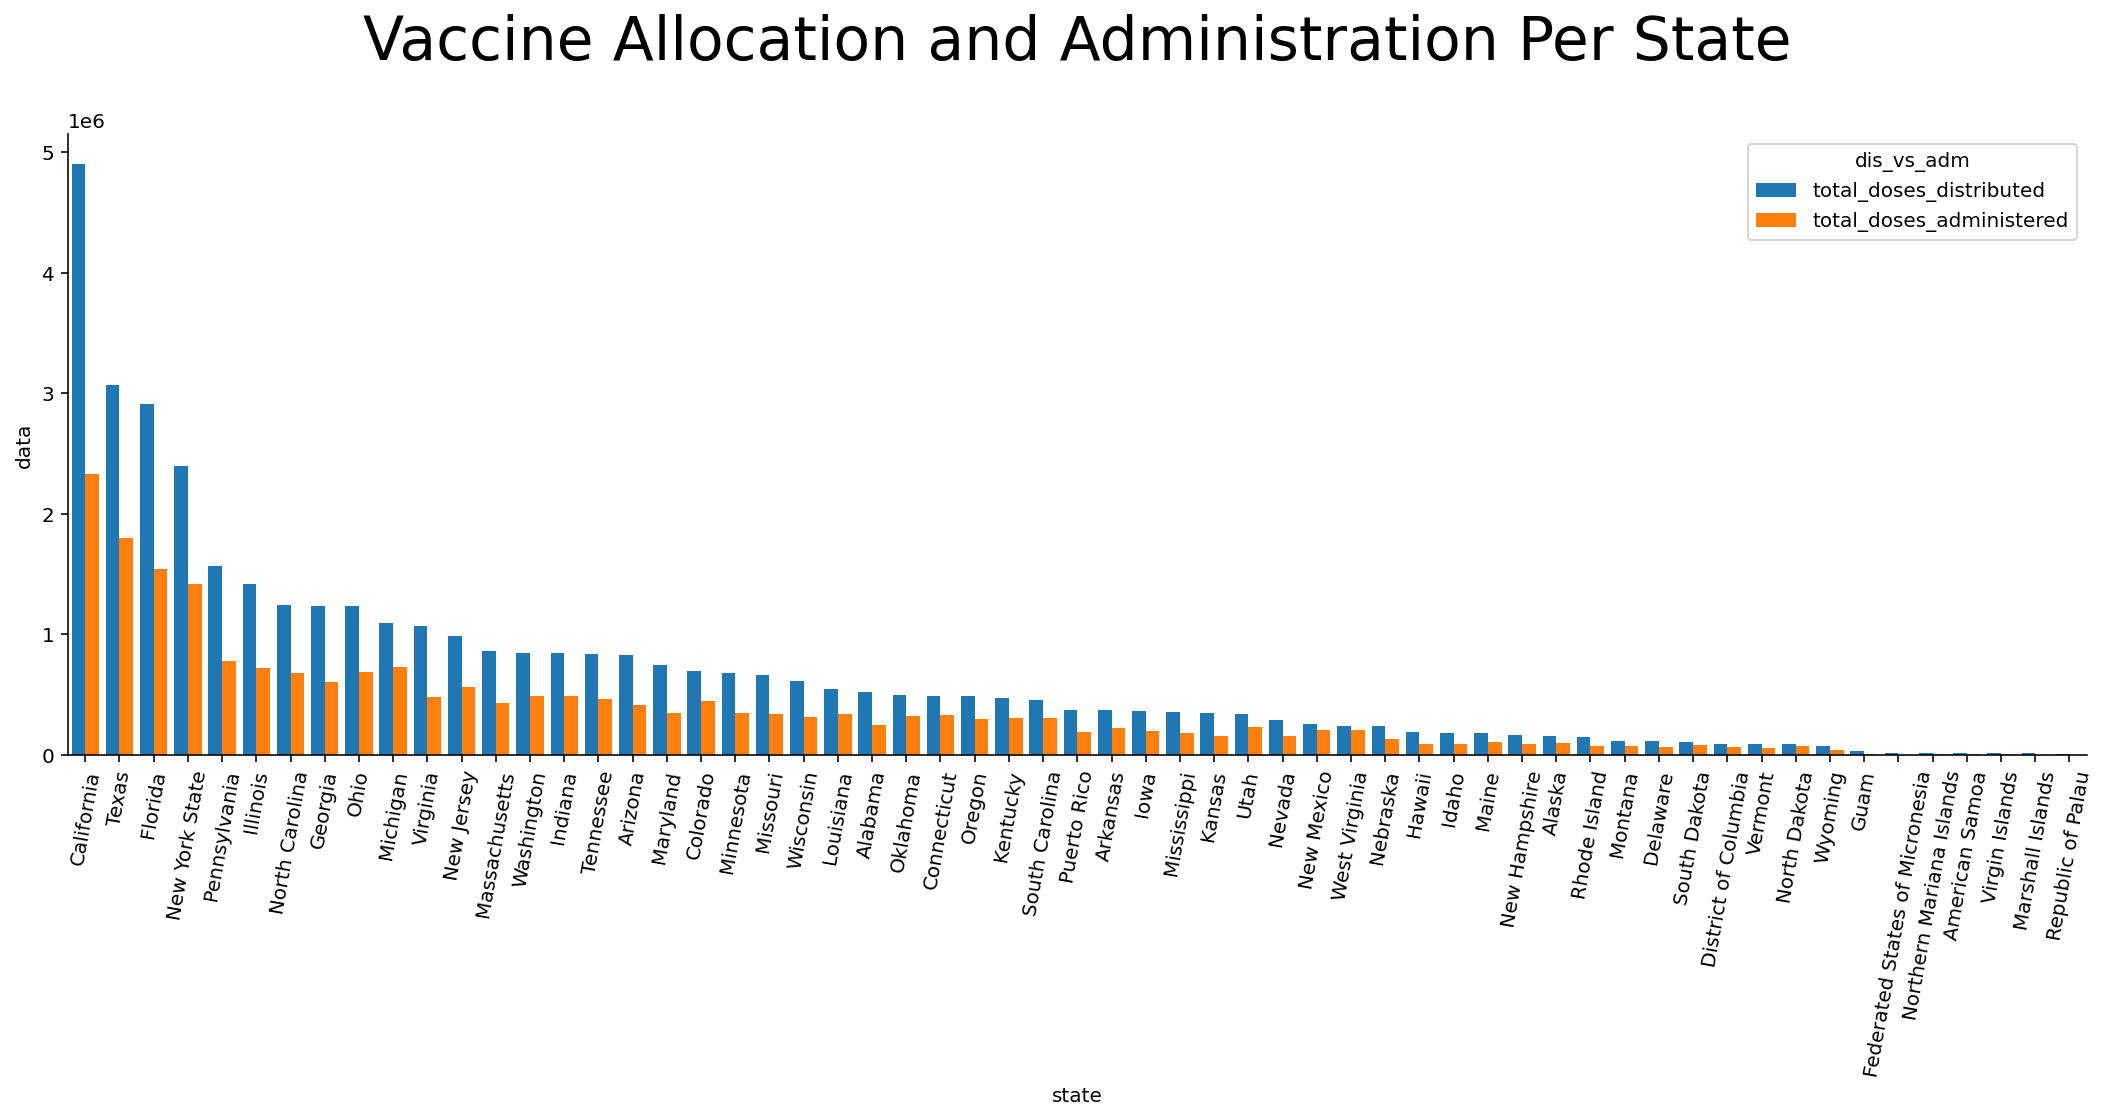

In [10]:
g=sns.catplot(x='state',y='data',hue='dis_vs_adm',legend_out=False,
                data=df_sort,saturation=1,kind='bar',height=5, aspect=3)
plt.xticks(rotation=80)
plt.title('Vaccine Allocation and Administration Per State',size=30,y=1.1);

# vaccine allocation and administration per state in the order of total doses distributed

In [11]:
# sort the original vaccine dataframe by total doses distributed, only keep the top 10

vac_408_sort=vac_408.sort_values(by='total_doses_distributed',ascending=False)[:10]
vac_408_sort.head()

,state,total_doses_distributed,total_doses_administered,doses_distributed_100k,doses_administed_100k,people_1+_dose,doses_1+_100k,people_2_doses,doses_2_100k
6,California,4906525,2330633,12418.0,5899.0,1954048,4945.0,371482,371482
53,Texas,3070825,1804006,10591.0,6222.0,1532381,5285.0,270118,270118
12,Florida,2908275,1544794,13541.0,7193.0,1384407,6446.0,156298,156298
42,New York State,2395950,1418313,12316.0,7291.0,1215450,6248.0,183915,183915
46,Pennsylvania,1564125,776799,12218.0,6068.0,639526,4996.0,135939,135939


In [12]:
df_sort_10=pd.melt(vac_408_sort[['state','total_doses_distributed','total_doses_administered']],\
           id_vars='state',var_name='dis_vs_adm',value_name='data')
df_sort_10.head()

,state,dis_vs_adm,data
0,California,total_doses_distributed,4906525
1,Texas,total_doses_distributed,3070825
2,Florida,total_doses_distributed,2908275
3,New York State,total_doses_distributed,2395950
4,Pennsylvania,total_doses_distributed,1564125


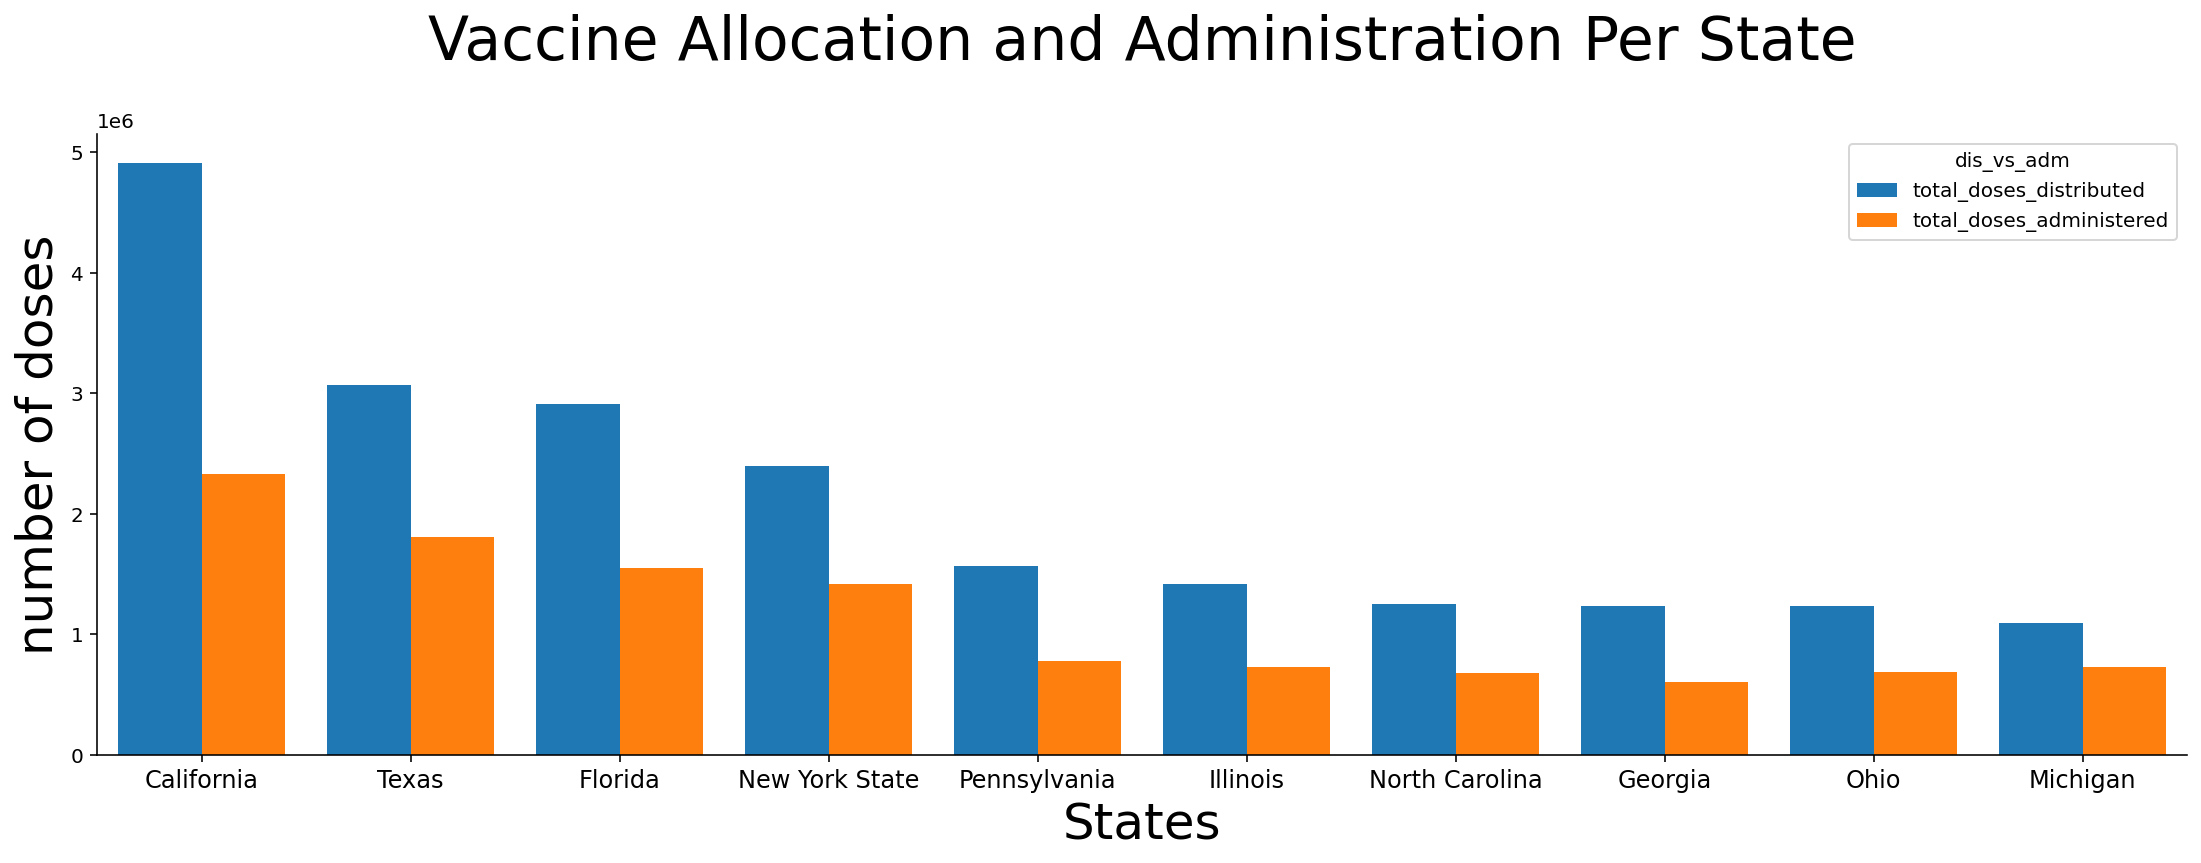

In [13]:
g=sns.catplot(x='state',y='data',hue='dis_vs_adm',legend_out=False,
                data=df_sort_10,saturation=1,kind='bar',height=5, aspect=3)
plt.xticks(size=12)
plt.title('Vaccine Allocation and Administration Per State',size=30,y=1.1)
plt.xlabel('States',size=25)
plt.ylabel('number of doses',size=25);

#the top 10 states with the most total doses distributed, versus the total doses administered 

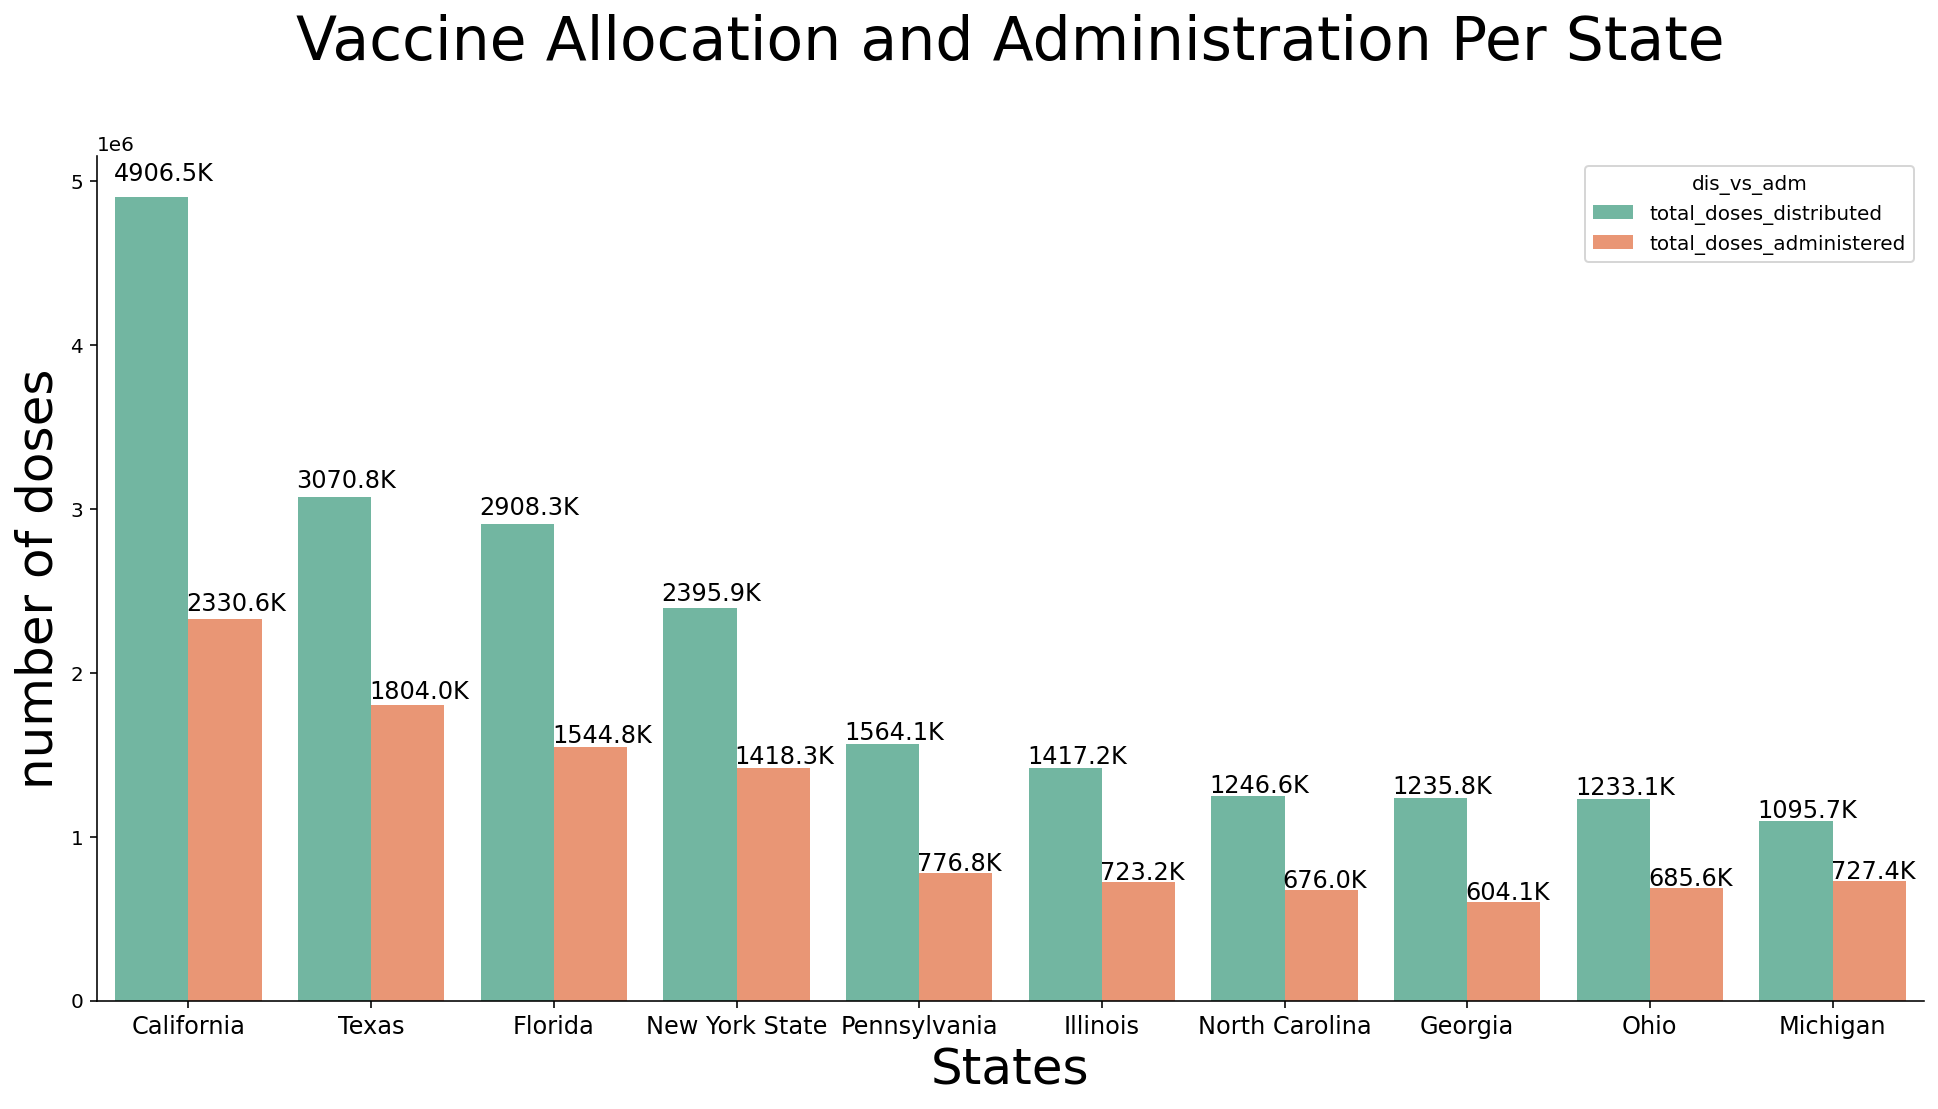

In [16]:
#https://stackoverflow.com/questions/55586912/seaborn-catplot-set-values-over-the-bars

#sns.set_palette("YlOrBr")
g = sns.catplot(x='state', y='data', data=df_sort_10, kind='bar', hue='dis_vs_adm',
                legend_out=False,palette=('Set2'))

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 
plt.xticks(size=12)
plt.title('Vaccine Allocation and Administration Per State',size=30,y=1.1)
plt.xlabel('States',size=25)
plt.ylabel('number of doses',size=25);


ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')